<a href="https://colab.research.google.com/github/CodeByJJY/RunningAppByJJY/blob/main/Over_the_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 3.5 MB/s eta 0:00:00


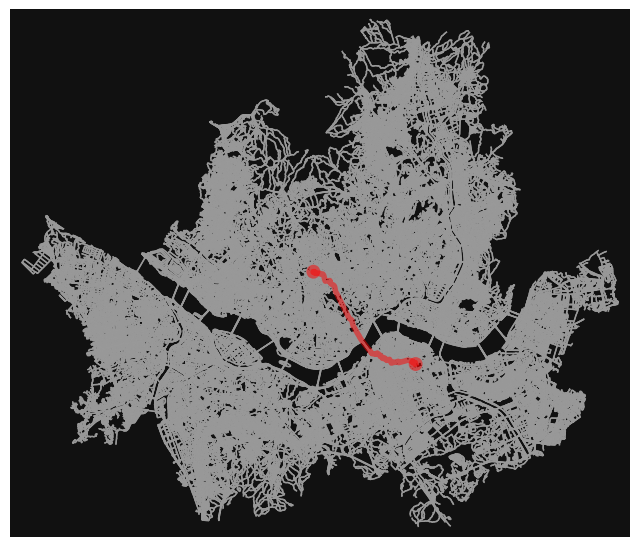

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# 장소 이름으로 그래프 생성
place_name = "Seoul, South Korea"
graph = ox.graph_from_place(place_name, network_type="walk")

# 시작점과 도착점 설정 (위도, 경도)
start_point = (37.5665, 126.9780) # 서울 시청
end_point = (37.5173, 127.0474) # 코엑스

# 시작점과 도착점에 가장 가까운 노드 찾기
start_node = ox.nearest_nodes(graph, start_point[1], start_point[0])
end_node = ox.nearest_nodes(graph, end_point[1], end_point[0])

# 최단 경로 계산 (A* 알고리즘 사용)
route = nx.shortest_path(graph, start_node, end_node, weight="length")

# 지도에 경로 표시
fig, ax = ox.plot_graph_route(graph, route, node_size=0)
plt.show()


Trying location: 서울특별시 중구 세종대로 110
Number of nodes: 1390
Number of edges: 3306
An unexpected error occurred: module 'osmnx' has no attribute 'get_node_coordinates'

Trying location: Seoul City Hall, Seoul, South Korea
Number of nodes: 1376
Number of edges: 3270
An unexpected error occurred: module 'osmnx' has no attribute 'get_node_coordinates'

Trying location: (37.5663, 126.9784)
Error: Found no graph nodes within the requested polygon.
Please check the location, distance, or network type.

Trying location: 서울특별시 용산구 한강대로 405 서울역
Number of nodes: 1959
Number of edges: 5105
An unexpected error occurred: module 'osmnx' has no attribute 'get_node_coordinates'

Trying location: (37.5546, 126.9708)
Number of nodes: 160
Number of edges: 289
An unexpected error occurred: module 'osmnx' has no attribute 'get_node_coordinates'


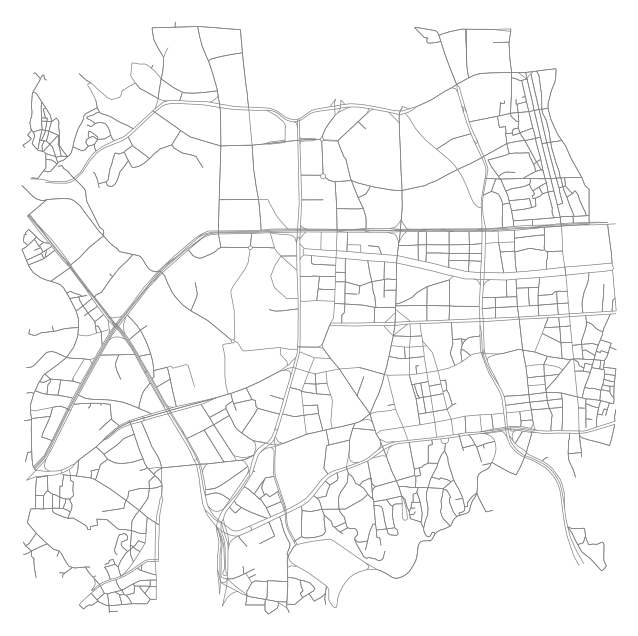

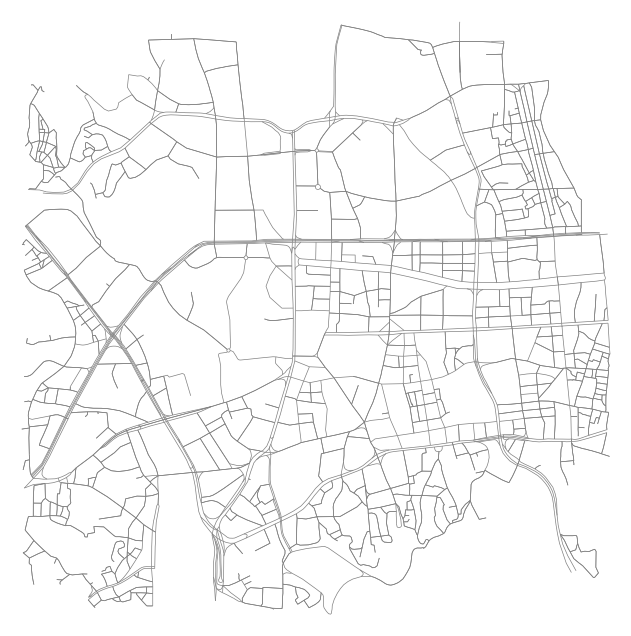

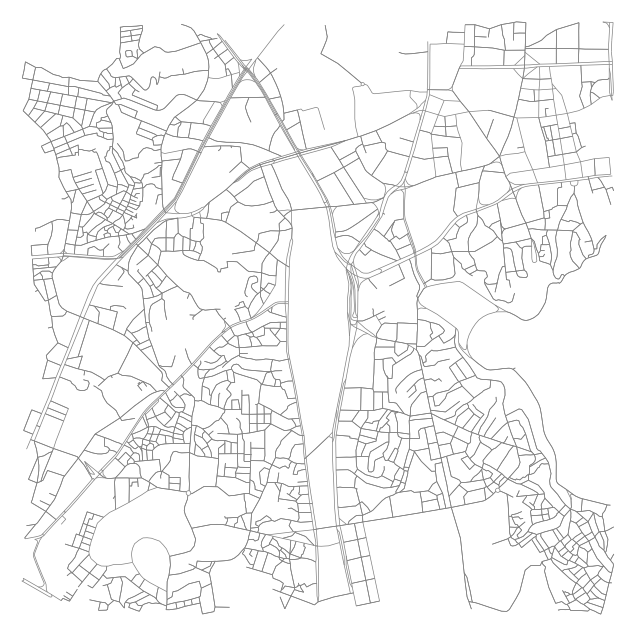

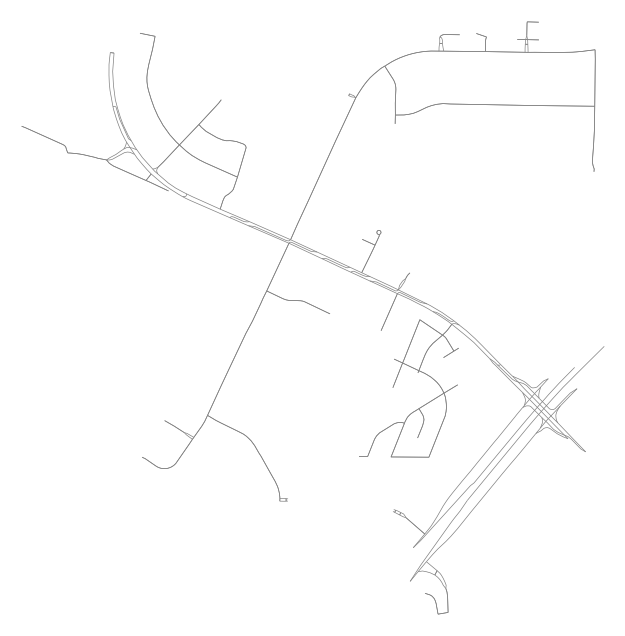

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

def plot_local_road(location, distance=1000, network_type='drive', savefig=False):
    """
    지정한 위치를 중심으로 반경 내의 도로를 시각화하는 함수 (좌표 사용 및 반경 지정 기능 추가)
    """
    try:
        # 위치를 좌표로 변환 (Nominatim 에러 처리)
        try:
            y, x = ox.geocode(location)
        except Exception as e:
            print(f"Geocoding error: {e}")
            print("Please provide a more specific location or use coordinates directly.")
            return

        # 좌표를 중심으로 그래프 생성 (반경 지정)
        G = ox.graph_from_point((y, x), dist=distance, network_type=network_type)

        if not G.nodes:
            raise ValueError("No nodes found within the specified area. Try increasing the distance or changing the network type.")

        # 중심 노드 찾기
        center_node = ox.nearest_nodes(G, x, y)

        # 그래프 정보 출력
        print("Number of nodes:", len(G.nodes))
        print("Number of edges:", len(G.edges))

        # 그래프 시각화
        fig, ax = ox.plot_graph(G, node_size=0, show=False, close=False, bgcolor='w', edge_color='gray', edge_linewidth=0.5, node_color='r')
        nx.draw_networkx_nodes(G, pos=ox.get_node_coordinates(G), nodelist=[center_node], node_size=100, node_color='r', ax=ax)

        if savefig:
            plt.savefig("map.png")
        plt.show()

    except ValueError as e:
        print(f"Error: {e}")
        print("Please check the location, distance, or network type.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# 예시 실행 (좌표 직접 사용 예시 추가)
locations = [
    "서울특별시 중구 세종대로 110",  # 상세 주소
    "Seoul City Hall, Seoul, South Korea", #영문 주소
    (37.5663, 126.9784),        # 서울시청 좌표 (위도, 경도) - **가장 권장되는 방식**
    "서울특별시 용산구 한강대로 405 서울역", #서울역 상세주소
    (37.5546, 126.9708)
]

for location in locations:
    print(f"\nTrying location: {location}")
    plot_local_road(location, distance=1500, network_type='drive', savefig=True) #network_type을 drive로 변경. bike 또는 walk로도 시도 가능.

In [1]:
# 1. Colab 환경에 필요한 패키지 설치
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python-headless

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,196 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,543 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/

Saving image.png to image.png


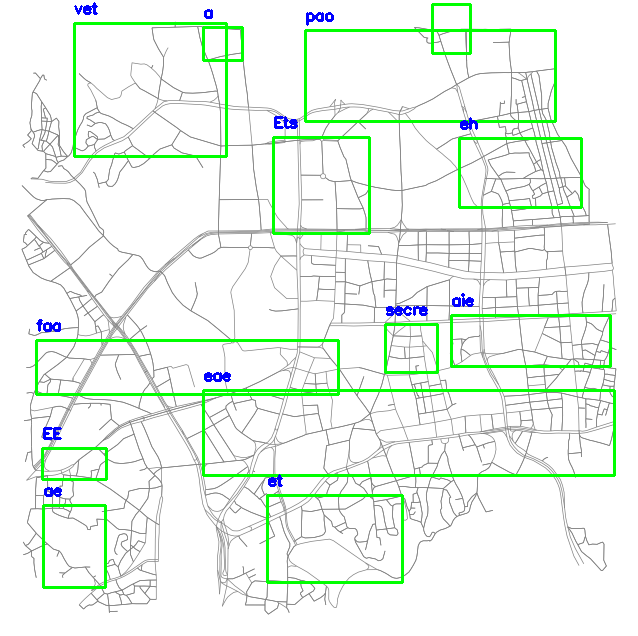

In [5]:
# 2. 필요한 라이브러리 임포트
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
import re

# 3. Tesseract OCR 설정
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# 4. 이미지 업로드 및 경로 설정
from google.colab import files
uploaded = files.upload()

# 5. 업로드된 이미지 처리
for filename in uploaded.keys():
    image_path = filename

# 6. 이미지 로드
image = cv2.imread(image_path)

# 7. 이미지 전처리 (Grayscale, Threshold)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 8. OCR 실행 및 위치 정보 가져오기
custom_config = r'--oem 3 --psm 6'
data = pytesseract.image_to_data(binary, config=custom_config, output_type=pytesseract.Output.DICT)

# 9. 글자와 위치 필터링
n_boxes = len(data['text'])
for i in range(n_boxes):
    if int(data['conf'][i]) > 0:  # Confidence가 유효한 경우
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        text = data['text'][i]
        # 알파벳만 포함하는 글자 필터링
        if re.match(r'[a-zA-Z]', text):
            # 원본 이미지에 사각형 박스와 텍스트 추가
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# 10. 결과 이미지 표시
cv2_imshow(image)


Saving image.png to image.png


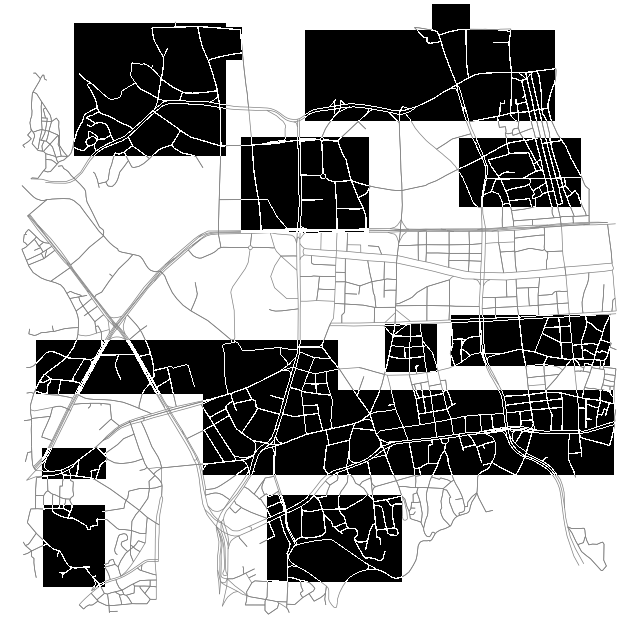

In [6]:
# # 1. Colab 환경에 필요한 패키지 설치
# !apt-get update
# !apt-get install -y tesseract-ocr
# !pip install pytesseract opencv-python-headless

# 2. 필요한 라이브러리 임포트
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
import numpy as np

# 3. Tesseract OCR 설정
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# 4. 이미지 업로드 및 경로 설정
from google.colab import files
uploaded = files.upload()

# 5. 업로드된 이미지 처리
for filename in uploaded.keys():
    image_path = filename

# 6. 이미지 로드
image = cv2.imread(image_path)

# 7. 이미지 전처리 (Grayscale, Threshold)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 8. OCR 실행 및 위치 정보 가져오기
custom_config = r'--oem 3 --psm 6'
data = pytesseract.image_to_data(binary, config=custom_config, output_type=pytesseract.Output.DICT)

# 9. 글자 재현 및 위치 표시
output_image = image.copy()
n_boxes = len(data['text'])

for i in range(n_boxes):
    if int(data['conf'][i]) > 0:  # 유효한 신뢰도인 경우
        text = data['text'][i]
        if text.strip():  # 글자가 비어 있지 않은 경우
            # 글자의 위치와 크기
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            # 추출된 글자 모양 그대로 원본 이미지 위에 표시
            roi = binary[y:y+h, x:x+w]  # ROI에서 글자 추출
            resized_roi = cv2.resize(roi, (w, h))  # 크기 조정
            output_image[y:y+h, x:x+w] = cv2.cvtColor(resized_roi, cv2.COLOR_GRAY2BGR)

# 10. 결과 이미지 표시
cv2_imshow(output_image)


Saving 다운로드.png to 다운로드 (1).png


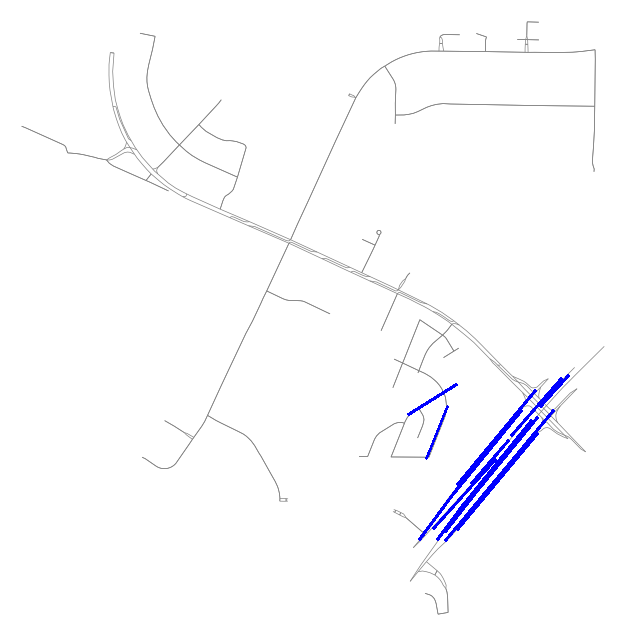

In [4]:
# # 1. Colab 환경에 필요한 패키지 설치
# !apt-get update
# !apt-get install -y tesseract-ocr
# !pip install pytesseract opencv-python-headless

# 2. 필요한 라이브러리 임포트
import cv2
import pytesseract
import numpy as np
from google.colab.patches import cv2_imshow

# 3. Tesseract OCR 설정
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# 4. 이미지 업로드 및 경로 설정
from google.colab import files
uploaded = files.upload()

# 5. 업로드된 이미지 처리
for filename in uploaded.keys():
    image_path = filename

# 6. 이미지 로드
image = cv2.imread(image_path)
output_image = image.copy()

# 7. 이미지 전처리 (Grayscale, Threshold)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 8. 라인 검출 (Hough Line Transform)
edges = cv2.Canny(binary, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=30, maxLineGap=5)

# 9. OCR 실행
custom_config = r'--oem 3 --psm 6'
data = pytesseract.image_to_data(binary, config=custom_config, output_type=pytesseract.Output.DICT)

# 10. 글자 형태와 패턴 라인 매칭
n_boxes = len(data['text'])

for i in range(n_boxes):
    if int(data['conf'][i]) > 0:  # 신뢰도 높은 경우만 처리
        text = data['text'][i].strip()
        if text.isalpha():  # 알파벳만 처리
            # 글자 위치 가져오기
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            # 글자가 나타나는 영역에 포함된 라인 찾기
            for line in lines:
                for x1, y1, x2, y2 in line:
                    # 라인이 글자 영역과 겹치는 경우
                    if x <= x1 <= x + w and y <= y1 <= y + h:
                        # 해당 라인을 파란색으로 표시
                        cv2.line(output_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# 11. 결과 이미지 출력
cv2_imshow(output_image)
